In [1]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
ctl = KMeans(n_clusters=15)

In [3]:
def calc_metric(image, x, y, w, h):
    image = image[y:y + h, x:x+w]
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    labels = ctl.fit_predict(image)
    
    label_counts = Counter(labels)

    dominant_color = ctl.cluster_centers_[label_counts.most_common(1)[0][0]]
    
    ctl.fit(img.reshape(-1, 3))

    plt.imshow(img)
    plt.show()

    return list(dominant_color.round())    

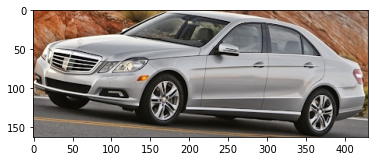

[194.0, 191.0, 192.0]

In [4]:
img = cv2.imread("test.jpg")
calc_metric(img, 0, 0, 430, 200)